In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Data assets/amz_uk_price_prediction_dataset.csv") 

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [33]:
df_freq = df['category'].value_counts()
df_freq.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

/var/folders/0d/nrxf3dnx3jq4b9fj3db32zgr0000gn/T/ipykernel_37761/2207014125.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_freq.head(5).index, y=df_freq.head(5).values, palette="Set3");


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

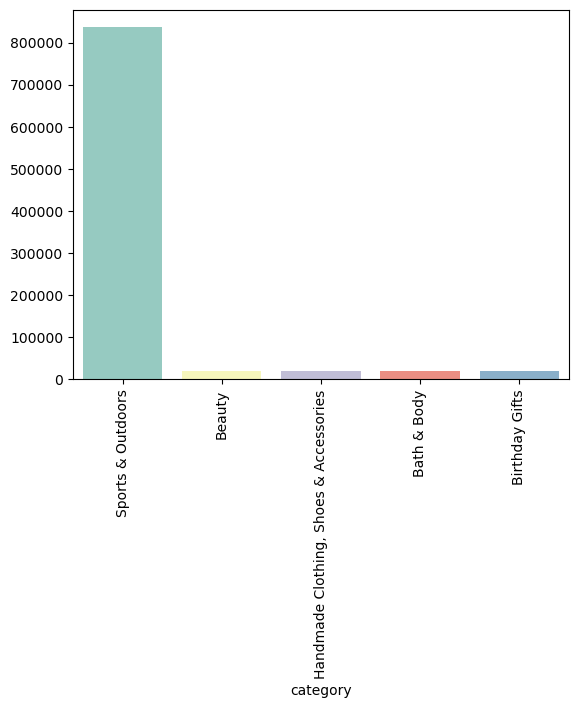

In [47]:
sns.barplot(x=df_freq.head(5).index, y=df_freq.head(5).values, palette="Set3");
plt.xticks(rotation=90)

<Axes: ylabel='count'>

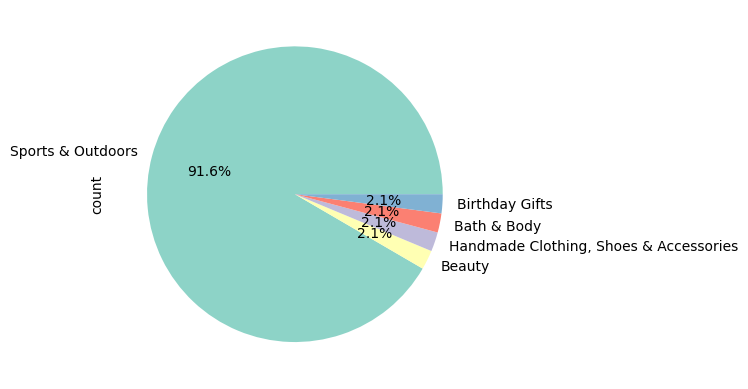

In [49]:
df_freq.head(5).plot.pie(autopct='%1.1f%%', startangle=360, colors=sns.color_palette("Set3"))

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [53]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

Average price = 89.24, where as mode is 9.99, this is likey due to an extreme outlier at the high end of prices. 

In [56]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.4853225653,
 345.6088617535223,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

Variance (119445.50): Large spread in prices
Standard Deviation: prices fluctuate a lot
Min & Max Prices: 0.0 to 100,000.0 → Huge range (indicates extreme outliers)

IQR is narrow (9.99 to 45.99) compared to the max → Suggests most products are cheap, but a few are extremely expensive outliers.

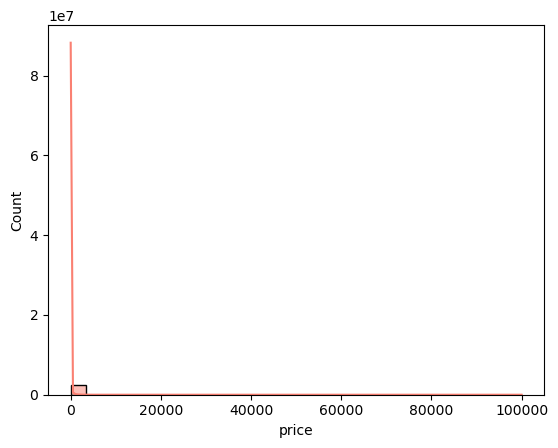

In [65]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")
plt.show()

The histogram is very difficult to read becuase the data is highly skewed, we could fix this by excluding outliers at a certain precentile, let's say 90'th

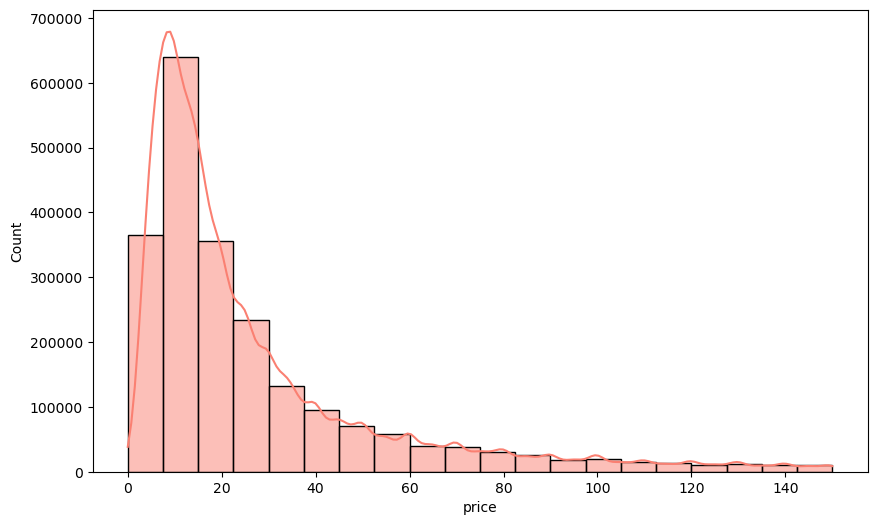

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] <= df['price'].quantile(0.90)]['price'], bins=20, kde=True, color="salmon")
plt.show()

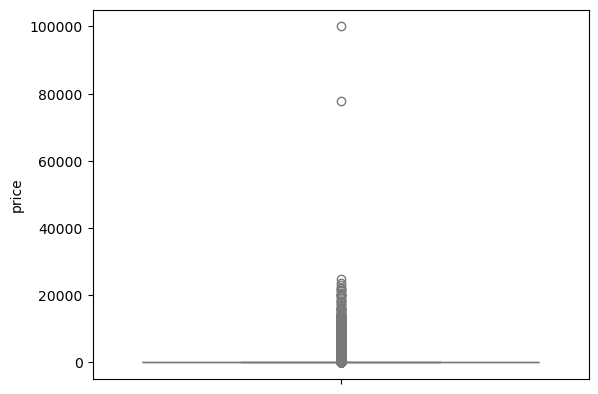

In [113]:
sns.boxplot(data = df['price'], color="lightblue")
plt.show()

In [ ]:
The box plot shows us that there are 2 products that are extreme outliers.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [116]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,log_price
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,3.135059
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers,3.218476
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,3.135059
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,3.496204
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers,2.943913
...,...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing,3.150169
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing,4.595019
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing,3.988799
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing,4.394326


In [122]:
mean_price = df['stars'].mean()
median_price = df['stars'].median()
mode_price = df['stars'].mode()[0]

mean_price, median_price, mode_price

(2.152836472966065, 0.0, 0.0)

The results would suggest that customers usually rate products very low, but this could also be that a rating of '0' could be an indication of a customer not rating a product at all.

In [128]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])

variance_rating, std_dev_rating, quantiles_rating

(4.81743402976196,
 2.1948653785054697,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

Variance: 4.82 → Indicates a moderate-to-high spread in ratings.
Standard Deviation: 2.19 → The ratings fluctuate by about 2.19 stars on average.
Quartiles (IQR):
Q1 (25%): 0.0
Median (50%): 0.0
Q3 (75%): 4.4
 - Most ratings are low (0.0), but some are high (4.4+), suggesting inconsistency.

In [130]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

Skew (0..08): insidactes a slight positing skew, rating might be marginally tilted towards higher values
kurtosis (-1.9): Light tail and flat peak, less likely to have extreme outliers.

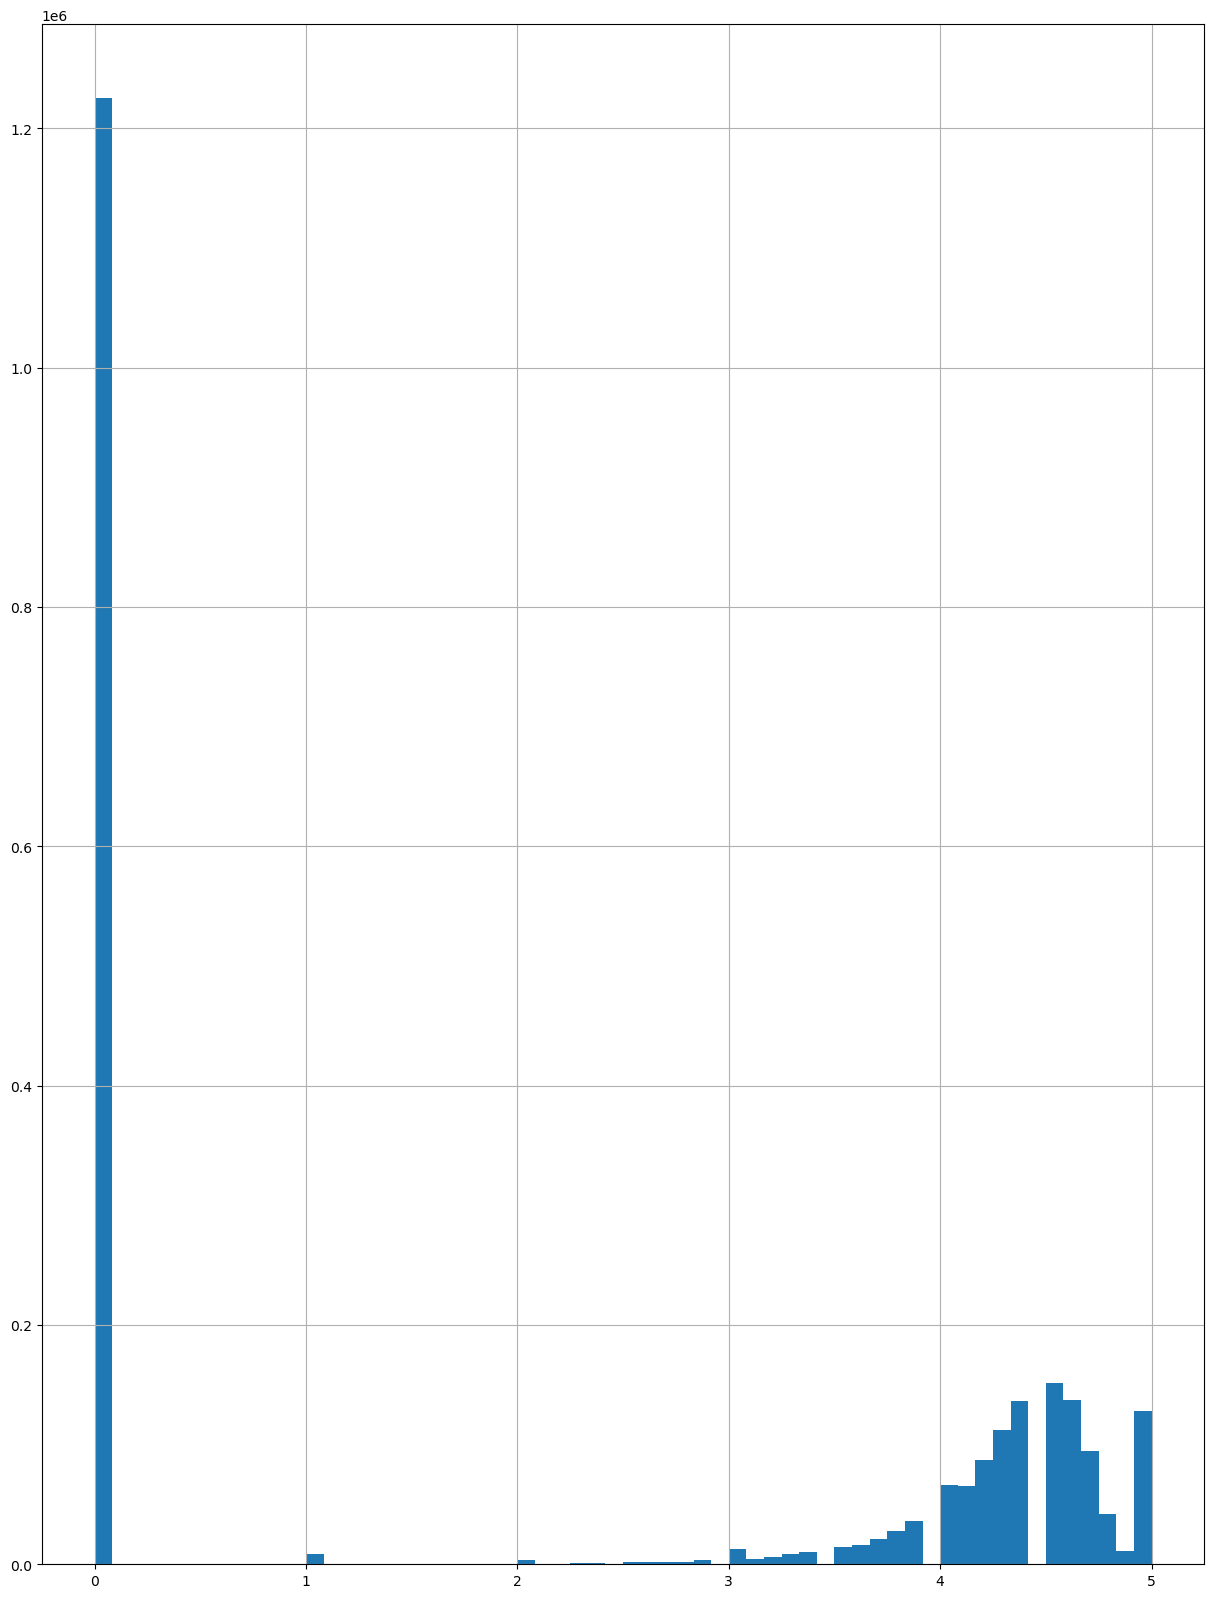

In [132]:
df['stars'].hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);
plt.show()

Yes, 0 is more common rating.